## <center> Leads Case Study </center>
### <center> By Ashutosh and Rancy </center>
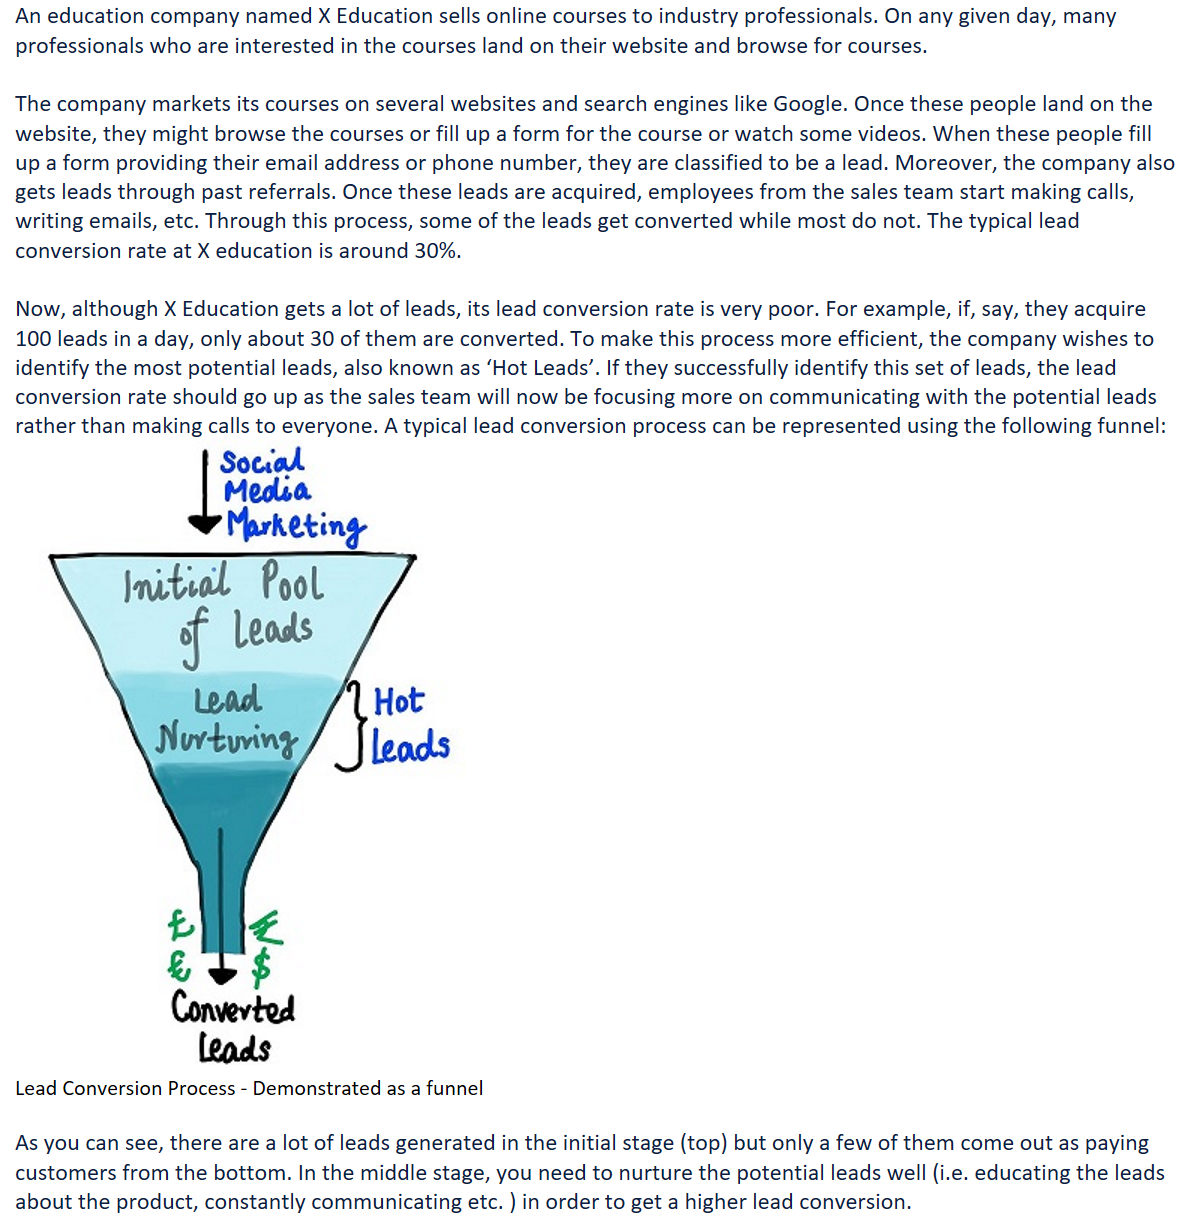

In [1]:
# Import Pandas and NumPy
import pandas as pd, numpy as np

In [2]:
# Set readability to get better view of the dataset

pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [3]:
# import dataset
leads_df = pd.read_csv('Leads.csv')

### Inspect the dataframe

In [4]:
# check the head of the dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Find out number of rows and columns in the dataset
leads_df.shape

(9240, 37)

In [6]:
## Check statistical information in the dataset
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
### check the type of the columnsa
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

***
<b> Initial Observation </b><br>
From inspection of the dataframe we observe following:
- There are 37 columns and 9240 rows
- On a glance we see there are quite a few columns with Null values
***

### <font color='blue'> <center> Perform Data Checks and Cleaning on the dataset </center> </font>

In [8]:
### Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
plt.style.use('ggplot')

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Checking column values, we know first two are unique id column hence checking from third
for col in leads_df.columns[2:]:
    print(col, end=': ')
    print(leads_df[col].unique())
    print()

Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Do Not Email: ['No' 'Yes']

Do Not Call: ['No' 'Yes']

Converted: [0 1]

TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

Total Time Spent on Website: [   0  674 1532 ...  603  483  927]

Page Views Per Visit: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 1

***
<b> Observations about the columns in the dataset </b><br>
- SPECIALIZATION, HOW DID YOU HEAR ABOUT X EDUCATION, Lead Profile have 'Select' as one of the values in the columns, we will replace those values with Null value
- There are a few columns such as Get Updates on DM content and more that have single value only, which is irrelavant for our model hence we will drop them
- There are quite a few columns with 'Yes' and 'No' values, we will convert them to binary 
***

### Find columns with only single values and drop them

In [10]:
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
leads_df = leads_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

### Replace value Select with Null

In [12]:
# # Before we look at remaining columns with null values, we know that there are few columns with "select" as  value we will Convert 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)

### Inspect Null Values

In [13]:
## Find null value count
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [14]:
# Find the percentage of null value based on which we will decide whether to keep or drop the column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

***
<b>Null Value Analysis:</b>

- Columns with Aysmmetrique prefix have more than 45% null values, we will drop them
- Additonally we have How did you hear about X Education, Lead Profile, Lead Quality that have more than 70% null values, we will drop them too
- We will look at columns with below 40% null values and take a call

***

In [15]:
Above40= list(round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)[round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2) > 40].index)

Above40

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [16]:
# We will drop Above40 columns

leads_df.drop(Above40, axis =1,inplace=True)

In [17]:
leads_df.shape

(9240, 25)

In [18]:
# City column also have almost 40%  null values, therefore we will drop her
leads_df.drop('City', axis =1,inplace=True)

In [19]:
### Let's now look at null values below 40%

In [20]:
below40= list(round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)[round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2) > 0].index)

below40

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

In [21]:
round(100*(leads_df[below40].isnull().sum()/len(leads_df[below40].index)), 2)

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
dtype: float64

In [22]:
# We will start with columns with null values in double digit percentage

#### Analyze Country Column

In [23]:
## Evaluate 'Country' column
leads_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [24]:
print(round(leads_df['Country'].isna().sum()*100/len(leads_df.index),2))
leads_df['Country'].value_counts()

26.63


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Sweden                     3
Uganda                     2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Ghana                      2
China                      2
Belgium                    2
Philippines                2
Bangladesh                 2
Indonesia                  1
Russia                     1
Liberia                    1
Malaysia                   1
Denmark                    1
Sri Lanka                  1
Tanzania      

In [25]:
# 36% are null values, we cannot drop these many rows, and cannot use Mode either so we will use value 'Not Given'
leads_df['Country'] = leads_df['Country'].replace(np.nan, 'Not Given')

In [26]:
leads_df['Country'].isna().sum()

0

In [27]:
#Interstingly, all other countries have really less values so we can club all of them into single category 'Other Countries'
def CheckCountry(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Given":
        category = "Not Given"
    else:
        category = "Other Countries"
    return category

leads_df['Country'] = leads_df.apply(lambda x:CheckCountry(x['Country']), axis = 1)
leads_df['Country'].value_counts()

India              6492
Not Given          2461
Other Countries     287
Name: Country, dtype: int64

#### Analyze Specialization Column

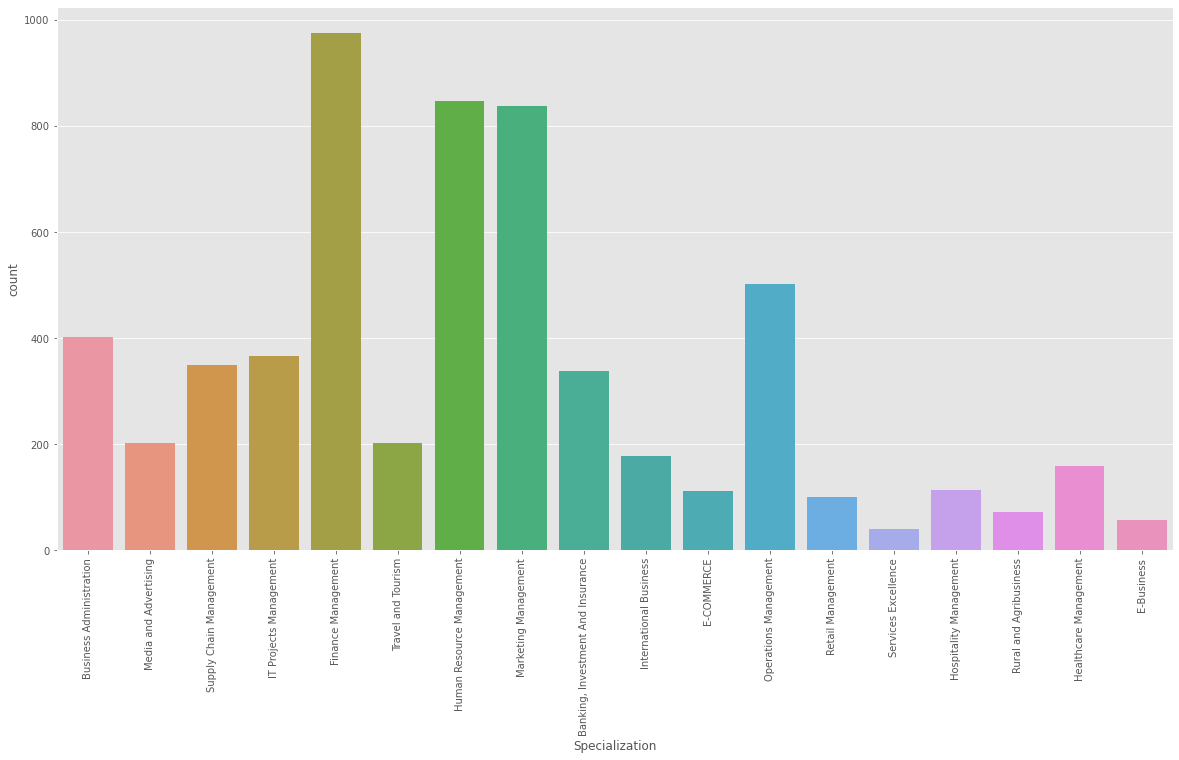

In [28]:
## Evaluate 'Specialization' column

plt.figure(figsize = (20,10))
sns.countplot(leads_df['Specialization'])
xticks(rotation = 90)
plt.show()

In [29]:
# From above we see atleast three specialization that have nearly same count
# We can therefore impute missing values with a new value called "Not Given"

leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Given')

In [30]:
leads_df['Specialization'].isna().sum()

0

#### Analyze 'What is your current occupation' Column

In [31]:
# Evaluate 'What is your current occupation'
leads_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [32]:
# print null value % of Occupation column
print(round(leads_df['What is your current occupation'].isna().sum()*100/len(leads_df.index),2))

29.11


In [33]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

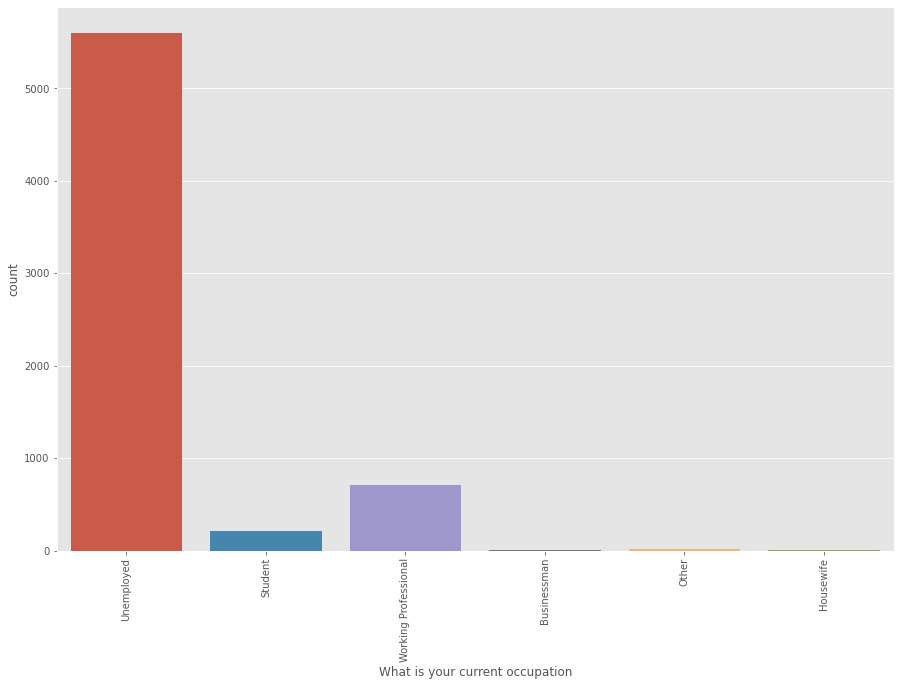

In [34]:
plt.figure(figsize = (15,10))
sns.countplot(leads_df['What is your current occupation'])
xticks(rotation = 90)
plt.show()

In [35]:
# Here as well 29% is significant number of null values, we cannot drop these many rows, and cannot use Mode either so we will use value 'Not Given'
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not Given')

In [36]:
leads_df['What is your current occupation'].isna().sum()

0

#### Analyze What matters most to you in choosing a course Column

In [37]:
# Evaluate 'What matters most to you in choosing a course' column
leads_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [38]:
print(round(leads_df['What matters most to you in choosing a course'].isna().sum()*100/len(leads_df.index),2))

29.32


In [39]:
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [40]:
# We will impute with Not Given as 29% data is missing
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan, 'Not Given')

In [41]:
leads_df['What matters most to you in choosing a course'].isna().sum()

0

#### Analyze Tags column

In [42]:
# Evaluate 'Tags' column
leads_df['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [43]:
# print null value % of Occupation column
print(round(leads_df['Tags'].isna().sum()*100/len(leads_df.index),2))

36.29


In [44]:
leads_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [45]:
# There are 36% null values under Tags column
# Tags indicate the current status of the lead assigned bt Sales team
# Its best to drop Tags columns as it does not appear to have any influence on our model

leads_df = leads_df.drop('Tags', axis=1)

### Let's look at Lead Source

In [46]:
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
youtubechannel          1
blog                    1
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
WeLearn                 1
Name: Lead Source, dtype: int64

In [47]:
print(round(leads_df['Lead Source'].isna().sum()*100/len(leads_df.index),2))

0.39


In [48]:
# There are only 0.39% null values, we will replace them with Mode value that is Google
leads_df['Lead Source']= leads_df['Lead Source'].replace(np.nan, 'Google')

In [49]:
leads_df['Lead Source'].isna().sum()

0

In [50]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [51]:
# Now we have 0 null values but there are a number of sources that are in single digits, we will club them into single value named 'Other Sources'
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media', 'NC_EDM',
                          'testone','Pay per Click Ads', 'WeLearn', 'blog', 'welearnblog_Home',
                          'youtubechannel','Welingak Website','Referral Sites'],'Other Sources')

In [52]:
leads_df['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other Sources      345
Name: Lead Source, dtype: int64

In [53]:
#check null values after treatement
leads_df.isna().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

In [54]:
# WE will lookat TotalVisits, Page Views Per Visit and Last Activity  in EDA and then will take a call on how to handle these columns

#### Prospect ID is a unique ID column we will drop it

In [55]:
leads_df.drop('Prospect ID', axis=1, inplace=True)

In [56]:
# Final columns that we have in the dataframe
leads_df.shape

(9240, 22)

## Perform EDA on the dataset

### Let us start with bivariate analysis

We will start with continuous variables and look at their distribution w.r.t target variable:
- Lead Conversion on TotalVisits
- Page Views Per Visit
- Last Activity
- Total Time spent on Website

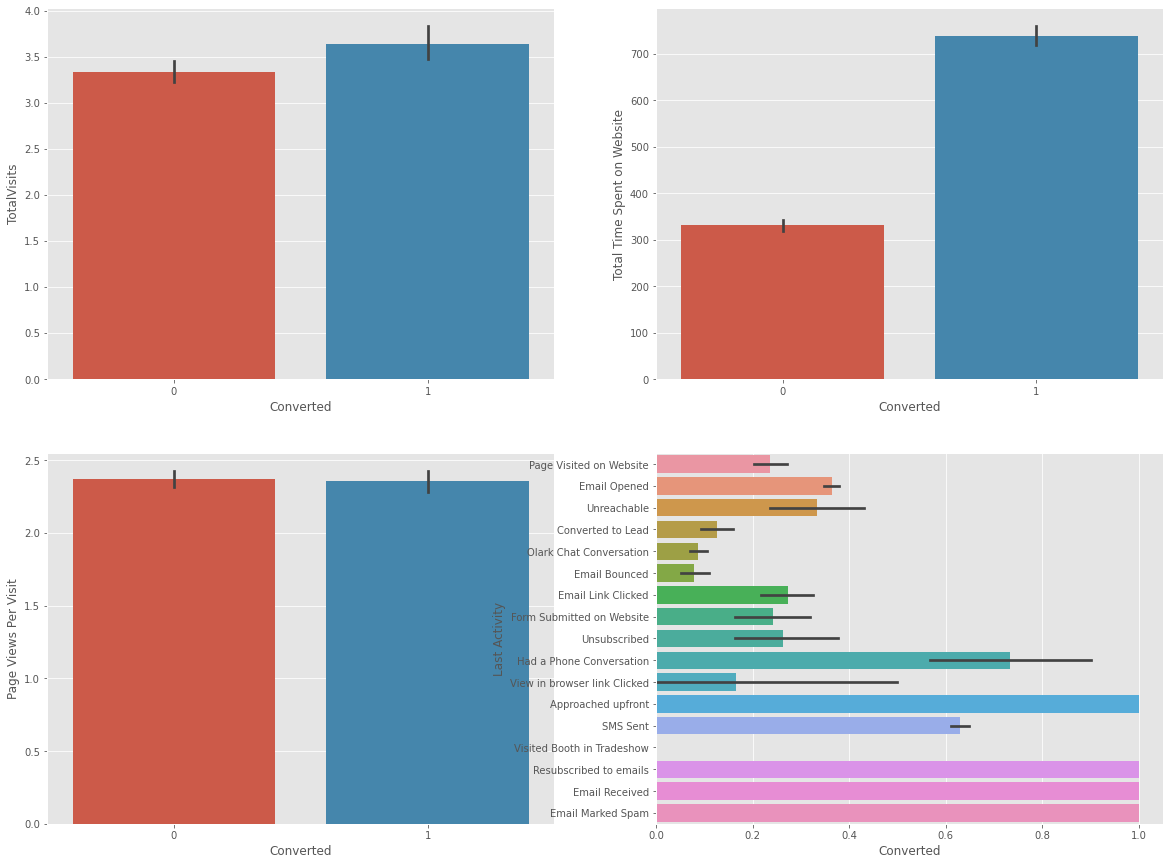

In [57]:
#Understanding the Lead Conversion on TotalVisits,Page Views Per Visit,Last Activity, Total Time spent on Website
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = leads_df)

plt.subplot(2,2,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads_df)

plt.subplot(2,2,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = leads_df)

plt.subplot(2,2,4)
sns.barplot(x = 'Converted', y = 'Last Activity',data = leads_df)

plt.show()

Text(0.5, 1.0, 'Last Activity')

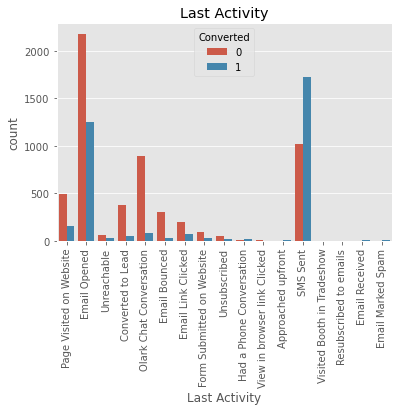

In [58]:
sns.countplot(x='Last Activity', hue='Converted', data= leads_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')


From above plots we observe following:
- We see good amount of conversions for Total Visits, Total time spent on website and Page views per visit, we will analyze them further with heatmap
- Against last Activity also we see good lead converstion against Email Opened and SMS Sent,we will keep this columns too

Now we will look at following variables related with target:
- Lead Origin
- Lead Source
- Country
- What is your current occupation
- Do Not Email
- Do Not Call
- X Education Forums
- Search 
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through recommendation
- A free copy of Mastering The Interview

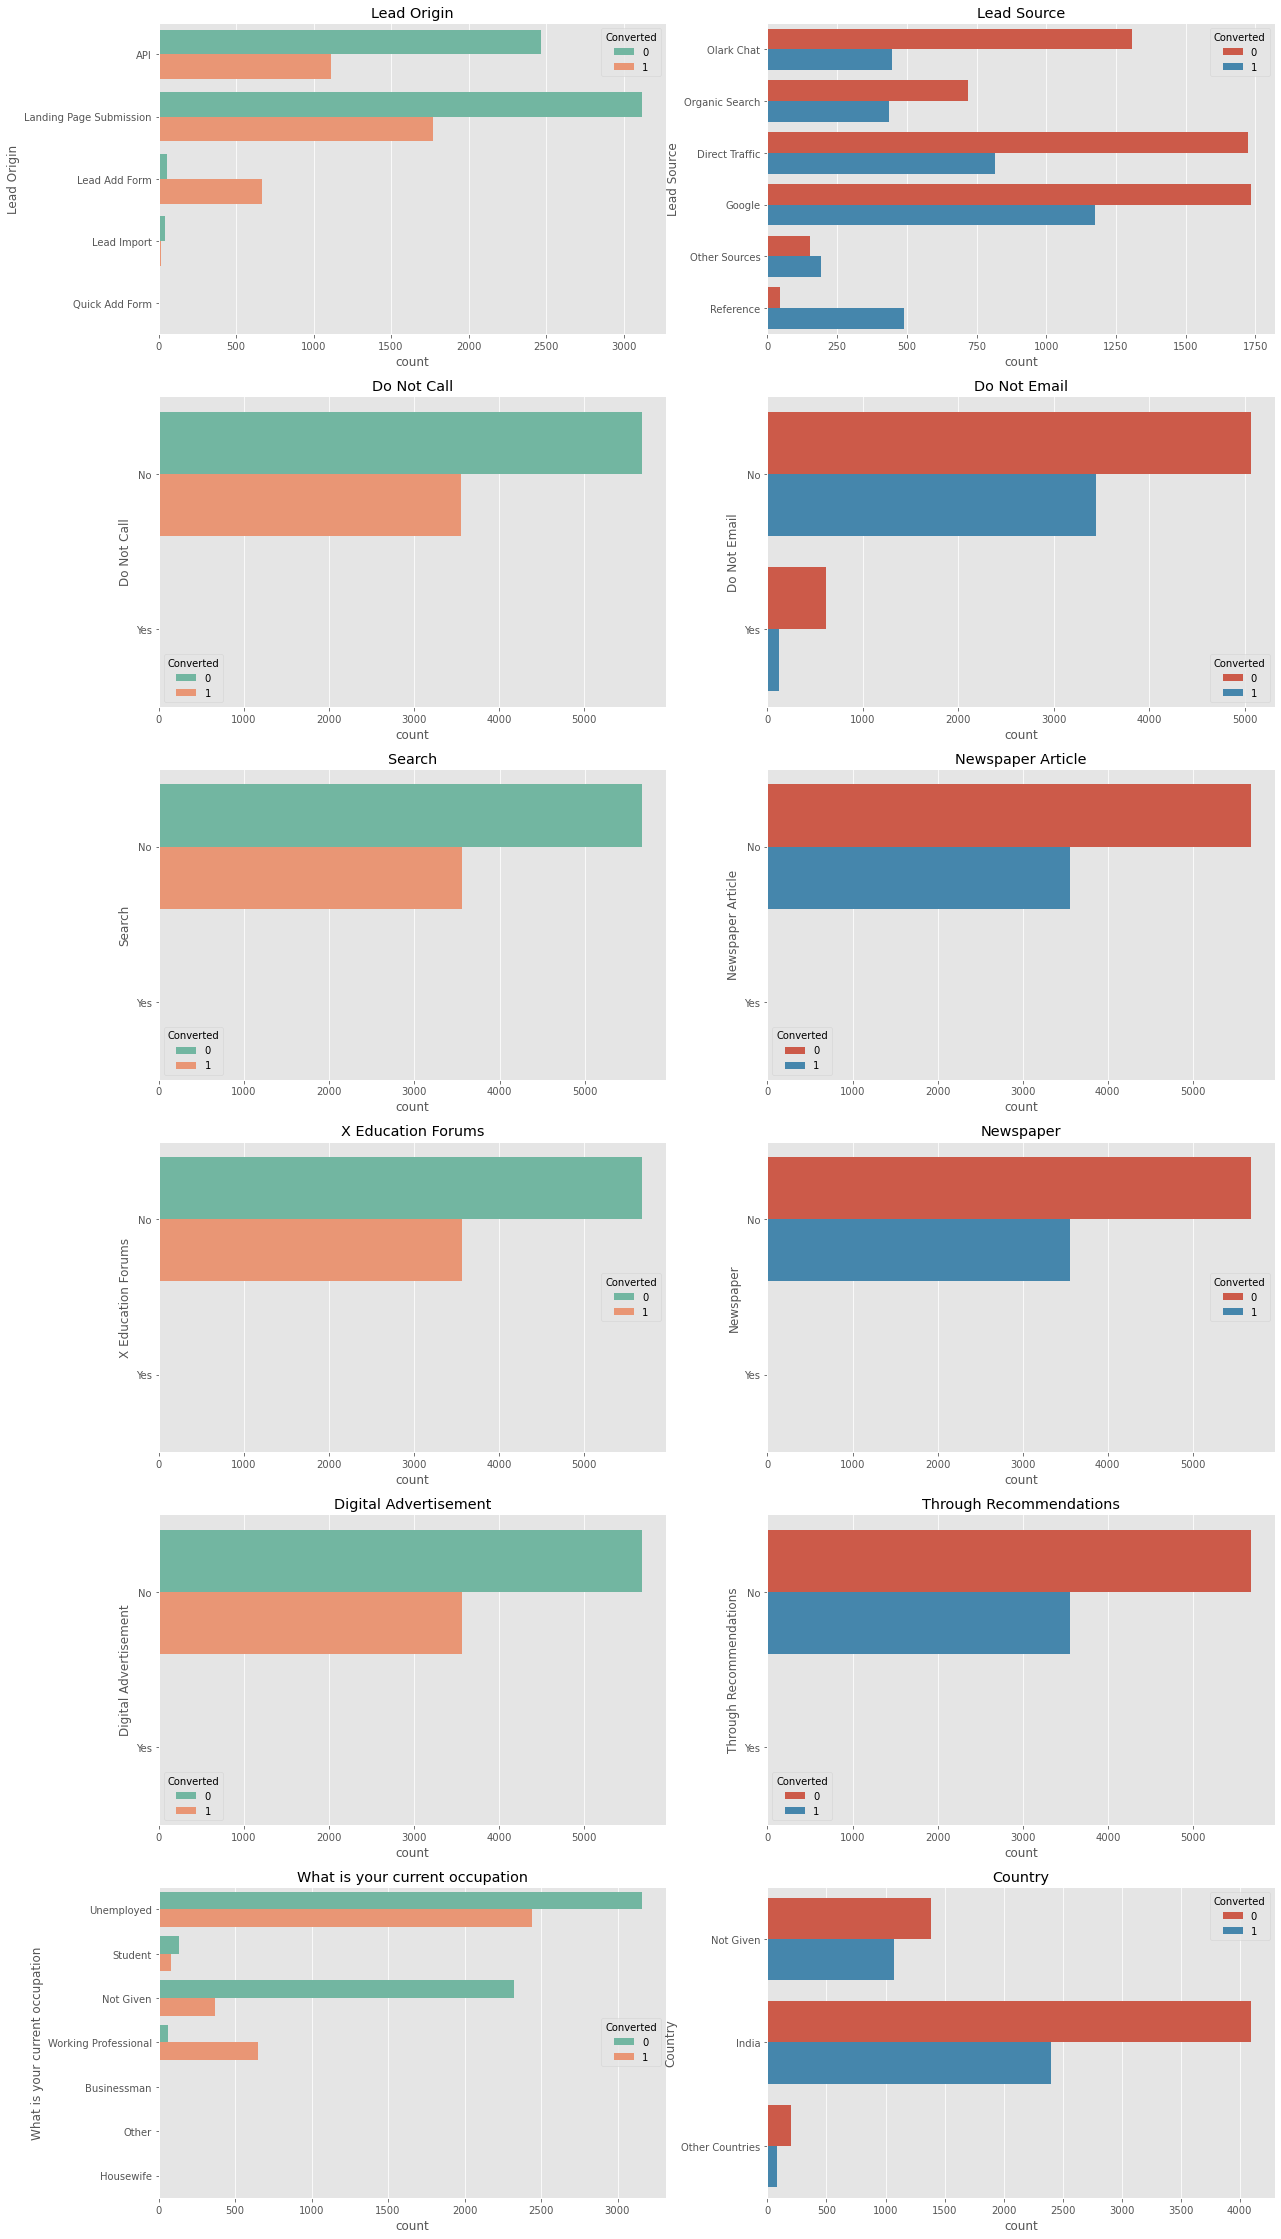

In [59]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(y="Lead Origin", hue="Converted", data=leads_df,palette = 'Set2')
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(y="Lead Source", hue="Converted", data=leads_df)
plt.title('Lead Source')

plt.subplot(6,2,3)
sns.countplot(y="Do Not Call", hue="Converted", data=leads_df,palette = 'Set2')
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(y="Do Not Email", hue="Converted", data=leads_df)
plt.title('Do Not Email')

plt.subplot(6,2,5)
sns.countplot(y="Search", hue="Converted", data=leads_df,palette = 'Set2')
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(y="Newspaper Article", hue="Converted", data=leads_df)
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(y="X Education Forums", hue="Converted", data=leads_df,palette = 'Set2')
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(y="Newspaper", hue="Converted", data=leads_df)
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(y="Digital Advertisement", hue="Converted", data=leads_df,palette = 'Set2')
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(y="Through Recommendations", hue="Converted", data=leads_df)
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(y="What is your current occupation", hue="Converted", data=leads_df,palette = 'Set2')
plt.title('What is your current occupation')

plt.subplot(6,2,12)
sns.countplot(y="Country", hue="Converted", data=leads_df)
plt.title('Country')

plt.show()


Text(0.5, 1.0, 'Specialization')

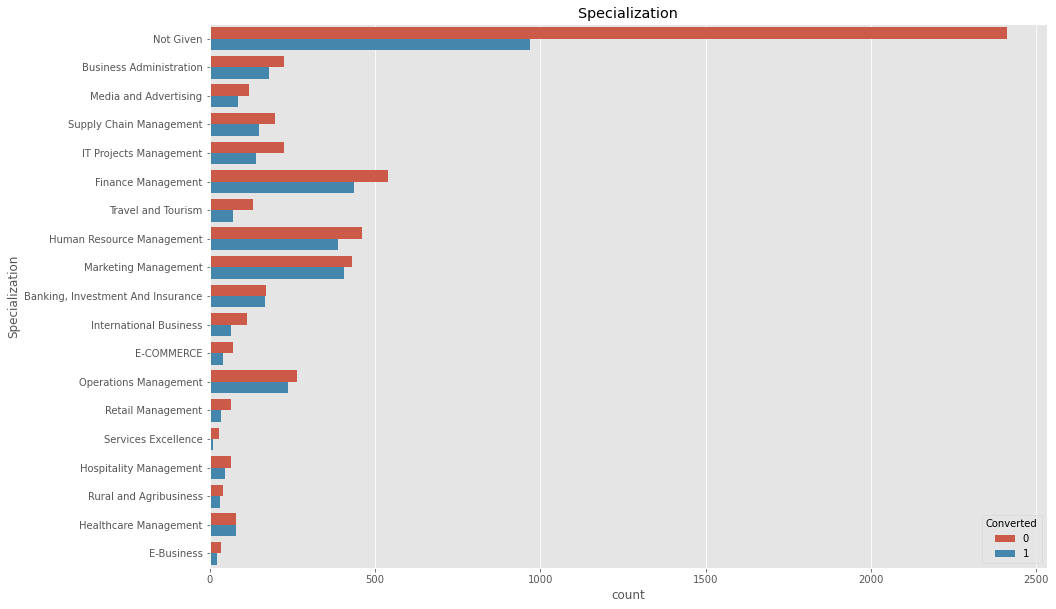

In [60]:
plt.figure(figsize = (15,10))
sns.countplot(y="Specialization", hue="Converted", data=leads_df)
plt.title('Specialization')

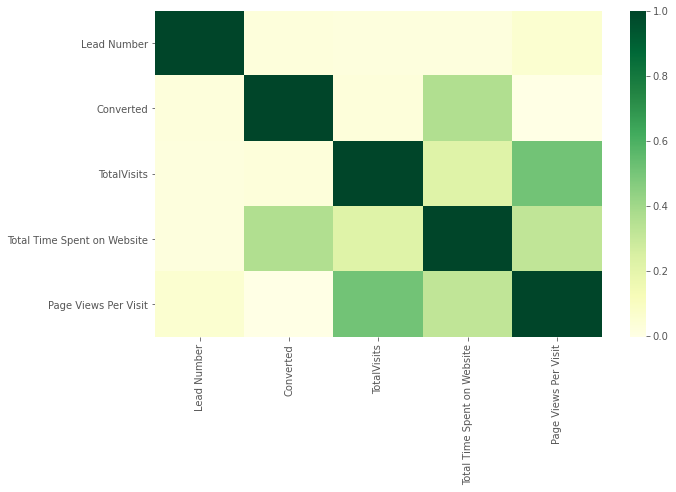

In [61]:
# Let us look at correlation between numeric variables
plt.figure(figsize=(10, 6))
sns.heatmap(leads_df.corr(),cmap="YlGn")
plt.show()

In [62]:
# From heatmap we see Converted and Total time spent on website have good correlation
# there is positive correlation between Total visits and Page Views Per Visit
# Total visits and Page Views Per Visit seems to have no correlation with Converted

Let us now see the count of conversion of target variable

In [63]:
#Lets check the converstion rate
ConversionRate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
print(f'The converstion rate is: {ConversionRate}')

The converstion rate is: 38.53896103896104


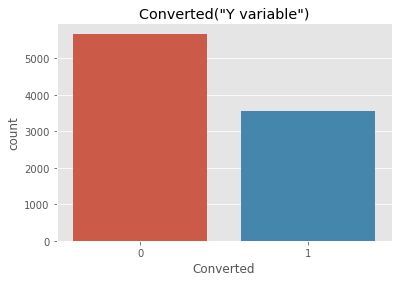

In [64]:
sns.countplot(leads_df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Outlier Detection

We will check for outliers in numerical variables

In [65]:
# checking all the statistical information of numerical variables
leads_df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
97%,657466.940000,1.000000,11.000000,1660.000000,7.000000


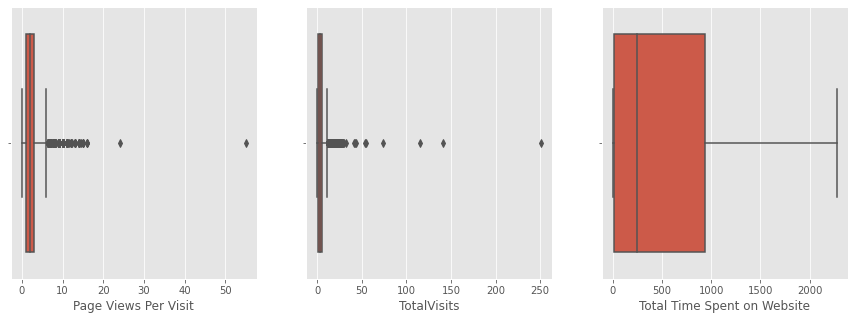

In [66]:
# Let us now check boxplot for Total Visits,Total time spent on website, page views per visit
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(data=leads_df, x='Page Views Per Visit')

plt.subplot(1,3,2)
sns.boxplot(data=leads_df, x='TotalVisits')

plt.subplot(1,3,3)
sns.boxplot(data=leads_df, x='Total Time Spent on Website')
plt.show()



***
<b> Conclusions from EDA:</b><br>
- The converstion rate is ~38.5%
- Google is the Lead Source that showed maximum successful Lead Conversion
- Under Lead Origin 'Landing Page Submission' had major lead conversion
- While Unemployed under What is your current occupation enquire the most but their conversion rate is around 60-65%
- Whereas working Professionals have highest rate of conversion
- NewsPaper, Referral, Digital Advertisement also seems have similar conversion ratio
- Not Given Specialization has highest converstion however the ratio of conversion of Finance, Operation HR and Marketing seems pretty high too
<br><br>
- From heatmap we see Converted and Total time spent on website have good correlation
- there is positive correlation between Total visits and Page Views Per Visit
- Total visits and Page Views Per Visit seems to have no correlation with Converted
<br><br>
- We see there are few outliers in Total Visits and Page Views per visit however since these both variables seems to be not correlated to Converted we can drop them
***

## Data Preparation

In [67]:
# Deleting Total Visits and Page Views per visit variables
leads_df.drop(['TotalVisits','Page Views Per Visit'], axis=1, inplace=True)

#### Converting binary variables (Yes/No) to 0/1

In [68]:
bin_vars = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[bin_vars] = leads_df[bin_vars].apply(binary_map)

In [69]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,Page Visited on Website,Not Given,Not Given,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,674,Email Opened,India,Not Given,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,305,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,India,Not Given,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


#### Dummy Variable Creation

In [70]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Number                                    9240 non-null   int64 
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9240 non-null   object
 3   Do Not Email                                   9240 non-null   int64 
 4   Do Not Call                                    9240 non-null   int64 
 5   Converted                                      9240 non-null   int64 
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Last Activity                                  9137 non-null   object
 8   Country                                        9240 non-null   object
 9   Specialization                                 9240 non-null   

In [71]:
dummy_var = pd.get_dummies(leads_df.select_dtypes(include=['object']), drop_first=True)
leads_df.drop(leads_df.select_dtypes(include=['object']).columns, axis=1,inplace=True)

leads_df = pd.concat([leads_df, dummy_var], axis=1)

In [72]:
leads_df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Not Given,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Given,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Given,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Lets us look at correlation matrix to find out about correlated variables after dummy creation

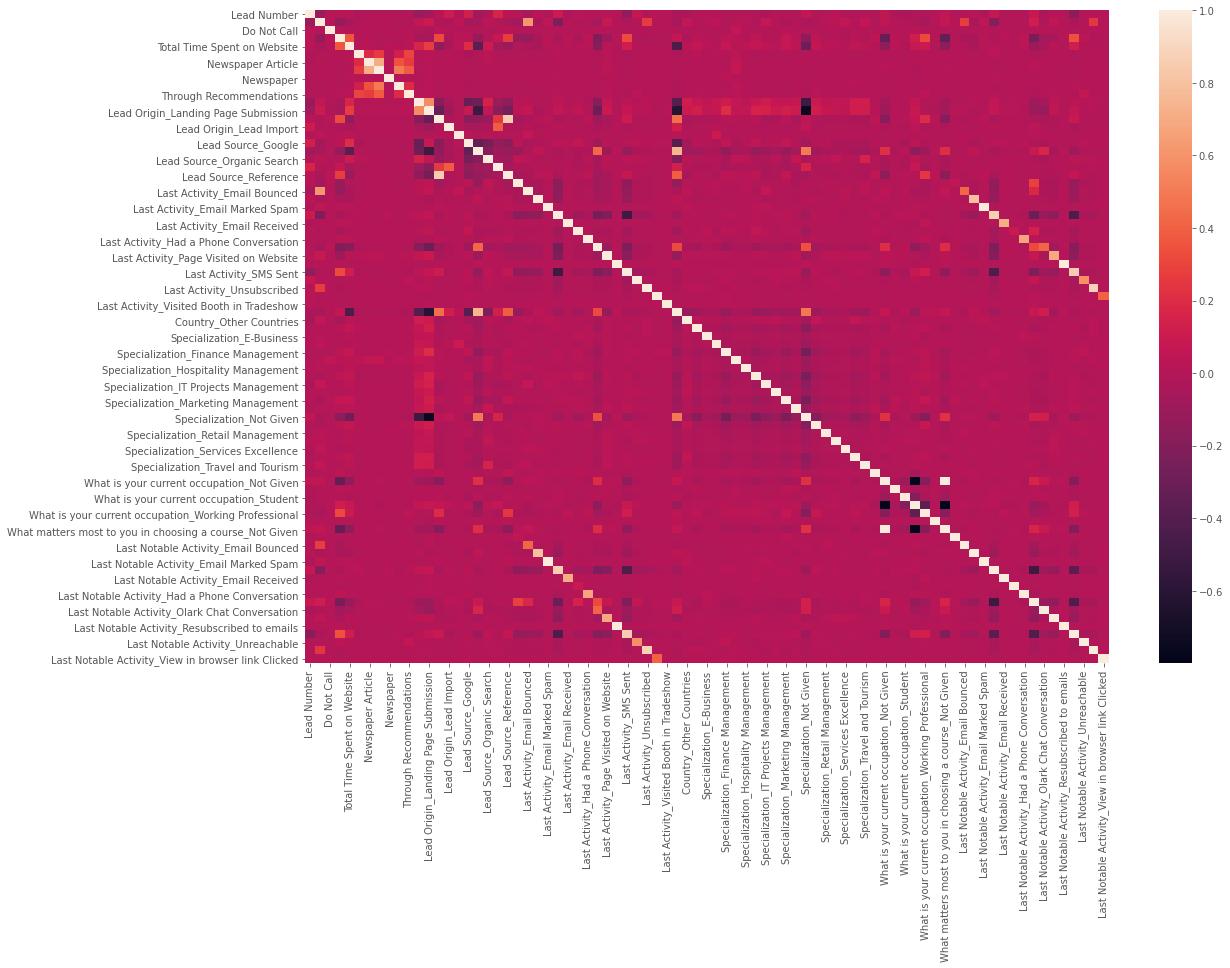

In [73]:
plt.figure(figsize=(18, 12))
sns.heatmap(leads_df.corr())
plt.show()

In [74]:
# Correlation Matrix is not very clear, hence generate top 10 highly correlated variables, we will also use VIF and P-Values during model building to keep checking for relevant variables
leads_df.corr().unstack().sort_values(ascending=False).drop_duplicates().head(10)

Lead Number                                              Lead Number                                  1.000000
What matters most to you in choosing a course_Not Given  What is your current occupation_Not Given    0.995041
Last Notable Activity_Unsubscribed                       Last Activity_Unsubscribed                   0.877108
Last Notable Activity_Email Opened                       Last Activity_Email Opened                   0.862718
Lead Source_Reference                                    Lead Origin_Lead Add Form                    0.853237
Last Notable Activity_SMS Sent                           Last Activity_SMS Sent                       0.852707
Last Activity_Email Link Clicked                         Last Notable Activity_Email Link Clicked     0.800764
Country_Not Given                                        Lead Source_Olark Chat                       0.742487
Last Activity_Email Received                             Last Notable Activity_Email Received         0.707069
N

In [75]:
# 'Lead Source_Olark Chat','Lead Origin_Lead Add Form','What is your current occupation_Not Given' appears to be highest correlated hence dropping these variables

leads_df.drop(['Lead Source_Olark Chat','Lead Origin_Lead Add Form','What is your current occupation_Not Given'], axis=1, inplace=True)

In [76]:
# Final columns after data cleaning and EDA
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Lead Number                                                              9240 non-null   int64
 1   Do Not Email                                                             9240 non-null   int64
 2   Do Not Call                                                              9240 non-null   int64
 3   Converted                                                                9240 non-null   int64
 4   Total Time Spent on Website                                              9240 non-null   int64
 5   Search                                                                   9240 non-null   int64
 6   Newspaper Article                                                        9240 non-null  

## Test-Train-Split

In [77]:
# import library to perfom test-train-split
from sklearn.model_selection import train_test_split

In [78]:
# Putting feature variables to X
X = leads_df.drop(['Converted'], axis=1)

X.head()

,Lead Number,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Not Given,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Given,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,674,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1428,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [80]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [81]:
#checkX, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6468, 77)
X_test: (2772, 77)
y_train: (6468,)
y_test: (2772,)


## Feature Scaling

In [82]:
# We will perform feature scaling of 'Total Time Spent on Website' variable using standard scaler method

In [83]:
# import scaler library
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Not Given,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Given,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,641410,0,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,597687,0,0,0.005716,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,626825,0,0,-0.691418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,587928,0,0,1.365219,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,622366,0,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
# View conversion rate before building the model
print(f'The converstion rate is: {round(ConversionRate,2)}%')

The converstion rate is: 38.54%


## Model Building

***
We will use Logistic Regression Model to get top features and generate lead scores
***

In [86]:
# get library to work with the model
import statsmodels.api as sm

In [87]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 13 Mar 2022   Deviance:                   1.4755e+05
Time:                        20:01:06   Pearson chi2:                 7.21e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -8.461e+14   2.99e+07  -2.83e+07      0.000   -8.46e+14   -8.46e+14
Lead Number                                                              2.757e+09     38.112   7.23e+07      0.000    2.76e+09    2.76e+09
Do Not Email                                                            -4.026e+13   4.43e+06  -9.08e+06      0.000   -4.03e+13   -4.03e+13
Do Not Call                                                              4.937e+15   4.77e+07   1.03e+08      0.000    4.94e+15    4.94e+15
Total Time Spent on Website                                              2.686e+14   9.73e+05   2.76e+08      0.000    2.69e+14    2.69e+14
Search                                                                   4.758e+14   2.21e+07   2.16e+07      0.000    4.76e+14    4.76e+14
Newspaper Article                                                        5.594e+15   6.73e+07   8.31e+07      0.000    5.59e+15    5.59e+15
X Education Forums                                                      -4.339e+15   1.11e+08   -3.9e+07      0.000   -4.34e+15   -4.34e+15
Newspaper                                                               -4.378e+15   6.73e+07  -6.51e+07      0.000   -4.38e+15   -4.38e+15
Digital Advertisement                                                   -1.336e+15   4.76e+07   -2.8e+07      0.000   -1.34e+15   -1.34e+15
Through Recommendations                                                  4.474e+14   2.86e+07   1.57e+07      0.000    4.47e+14    4.47e+14
A free copy of Mastering The Interview                                  -4.132e+13   2.66e+06  -1.55e+07      0.000   -4.13e+13   -4.13e+13
Lead Origin_Landing Page Submission                                     -2.961e+14   3.19e+06  -9.27e+07      0.000   -2.96e+14   -2.96e+14
Lead Origin_Lead Import                                                  -1.43e+15   1.29e+07  -1.11e+08      0.000   -1.43e+15   -1.43e+15
Lead Origin_Quick Add Form                                               4.325e+15    6.8e+07   6.36e+07      0.000    4.32e+15    4.32e+15
Lead Source_Google                                                        1.58e+14   2.65e+06   5.96e+07      0.000    1.58e+14    1.58e+14
Lead Source_Organic Search                                               2.711e+13      3e+06   9.04e+06      0.000    2.71e+13    2.71e+13
Lead Source_Other Sources                                                1.279e+15    5.1e+06   2.51e+08      0.000    1.28e+15    1.28e+15
Lead Source_Reference                                                    8.579e+14   4.62e+06   1.86e+08      0.000    8.58e+14    8.58e+14
Las

In [88]:
#We can see the trained model has got features with high p values thus it requires RFE

In [89]:
### Feature Selection Using RFE

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
#RFE results telling which features are taken(True) and which features are not considered (False)
rfe.support_

array([ True,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False])

In [93]:
#List of features taken as top 15 from RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 54),
 ('Newspaper Article', False, 62),
 ('X Education Forums', False, 56),
 ('Newspaper', False, 58),
 ('Digital Advertisement', False, 43),
 ('Through Recommendations', False, 42),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Origin_Quick Add Form', False, 48),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Other Sources', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Marked Spam', False, 53),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Email Received', False, 46),
 ('Last Activity_Form Submitted on Website',

In [94]:
#Dropping the eliminated features
col = X_train.columns[rfe.support_]

In [95]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Other Sources', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow', 'Country_Not Given', 'Country_Other Countries', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management',
       

In [96]:
##Assessing the model with StatsModels

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.5
Date:                Sun, 13 Mar 2022   Deviance:                       5384.9
Time:                        20:01:07   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -5.1735      0.966     -5.355      0.000      -7.067      -3.280
Lead Number                                              8.861e-06   1.52e-06      5.822      0.000    5.88e-06    1.18e-05
Do Not Email                                               -0.9268      0.164     -5.654      0.000      -1.248      -0.606
Total Time Spent on Website                                 0.9058      0.036     24.841      0.000       0.834       0.977
A free copy of Mastering The Interview                     -0.2749      0.087     -3.143      0.002      -0.446      -0.104
Lead Origin_Landing Page Submission                        -1.3836      0.123    -11.248      0.000      -1.625      -1.143
Lead Source_Reference                                       2.1539      0.207     10.395      0.000       1.748       2.560
Last Activity_Converted to Lead                            -0.8309      0.237     -3.513      0.000      -1.294      -0.367
Last Activity_Email Opened                                  0.2584      0.114      2.271      0.023       0.035       0.481
Last Activity_Olark Chat Conversation                      -0.7330      0.190     -3.851      0.000      -1.106      -0.360
Last Activity_SMS Sent                                      1.0580      0.166      6.367      0.000       0.732       1.384
Specialization_Not Given                                   -0.8738      0.123     -7.126      0.000      -1.114      -0.633
What is your current occupation_Working Professional        2.4212      0.193     12.568      0.000       2.044       2.799
What matters most to you in choosing a course_Not Given    -1.1082      0.087    -12.740      0.000      -1.279      -0.938
Last Notable Activity_Modified                             -0.5058      0.107     -4.731      0.000      -0.715      -0.296
Last Notable Activity_SMS Sent                              0.5783      0.181      3.195      0.001       0.224       0.933
===========================================================================================================================
"""

In [98]:
## P value wise model looks good

In [99]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.491692
6795    0.104719
3516    0.297216
8105    0.821380
3934    0.170565
4844    0.990292
3297    0.158998
8071    0.979568
987     0.100919
7423    0.932698
dtype: float64

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49169162, 0.1047186 , 0.29721642, 0.82137974, 0.17056501,
       0.99029191, 0.15899782, 0.9795677 , 0.10091882, 0.93269758])

In [101]:
##Creating a dataframe with the actual Lead flag and the predicted probabilities

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number
0,0,0.491692,1871
1,0,0.104719,6795
2,0,0.297216,3516
3,0,0.821380,8105
4,0,0.170565,3934


In [103]:
##Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0 

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted
0,0,0.491692,1871,0
1,0,0.104719,6795,0
2,0,0.297216,3516,0
3,0,0.821380,8105,1
4,0,0.170565,3934,0


In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3518  484]
 [ 750 1716]]


In [107]:
# Predicted     not_converted  converted
# Actual
# not_converted        3805      197
# converted            442       2024

In [108]:
 # Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)) 

0.8092145949288806


In [109]:
##Checking VIFs

In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,19.77
9,Last Activity_SMS Sent,7.09
14,Last Notable Activity_SMS Sent,6.99
4,Lead Origin_Landing Page Submission,6.83
10,Specialization_Not Given,4.86
7,Last Activity_Email Opened,4.11
13,Last Notable Activity_Modified,3.32
3,A free copy of Mastering The Interview,2.20
8,Last Activity_Olark Chat Conversation,1.92
12,What matters most to you in choosing a course_...,1.66


In [112]:
# As we can see there are 5 features with high VIF namely Lead Number, Lead Origin_Landing Page Submission,Last Notable Activity_SMS Sent and Specialization_Not Given

In [113]:
#Dropping Lead Number as its VIF is very high
col = col.drop('Lead Number', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Source_Reference', 'Last Activity_Converted to Lead', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Not Given', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_Not Given', 'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'], dtype='object')

In [114]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.5
Date:                Sun, 13 Mar 2022   Deviance:                       5419.1
Time:                        20:01:07   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                       0.3815      0.152      2.514      0.012       0.084       0.679
Do Not Email                                               -1.0008      0.163     -6.127      0.000      -1.321      -0.681
Total Time Spent on Website                                 0.9137      0.036     25.102      0.000       0.842       0.985
A free copy of Mastering The Interview                     -0.3139      0.087     -3.606      0.000      -0.484      -0.143
Lead Origin_Landing Page Submission                        -1.4160      0.123    -11.527      0.000      -1.657      -1.175
Lead Source_Reference                                       2.1379      0.206     10.384      0.000       1.734       2.541
Last Activity_Converted to Lead                            -0.8380      0.234     -3.576      0.000      -1.297      -0.379
Last Activity_Email Opened                                  0.2350      0.113      2.073      0.038       0.013       0.457
Last Activity_Olark Chat Conversation                      -0.7878      0.189     -4.169      0.000      -1.158      -0.417
Last Activity_SMS Sent                                      1.0301      0.166      6.217      0.000       0.705       1.355
Specialization_Not Given                                   -0.8919      0.122     -7.287      0.000      -1.132      -0.652
What is your current occupation_Working Professional        2.3856      0.191     12.469      0.000       2.011       2.761
What matters most to you in choosing a course_Not Given    -1.0986      0.087    -12.617      0.000      -1.269      -0.928
Last Notable Activity_Modified                             -0.4849      0.107     -4.552      0.000      -0.694      -0.276
Last Notable Activity_SMS Sent                              0.4855      0.180      2.703      0.007       0.133       0.838
===========================================================================================================================
"""

In [115]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [116]:
y_train_pred[:10]

array([0.45205627, 0.11920547, 0.28760027, 0.84922153, 0.17233089,
       0.9897363 , 0.14428854, 0.98495056, 0.08484058, 0.94317459])

In [117]:
y_train_pred_final['Conv_Prob'] = y_train_pred

In [118]:
# Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted
0,0,0.452056,1871,0
1,0,0.119205,6795,0
2,0,0.287600,3516,0
3,0,0.849222,8105,1
4,0,0.172331,3934,0


In [119]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8064316635745207


In [120]:
#Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,6.86
13,Last Notable Activity_SMS Sent,6.67
3,Lead Origin_Landing Page Submission,4.44
9,Specialization_Not Given,3.10
12,Last Notable Activity_Modified,2.84
6,Last Activity_Email Opened,2.57
2,A free copy of Mastering The Interview,2.15
7,Last Activity_Olark Chat Conversation,1.76
11,What matters most to you in choosing a course_...,1.64
5,Last Activity_Converted to Lead,1.36


In [121]:
# Dropping "Last Notable Activity_SMS Sent" since it has a high VIF
col = col.drop('Last Notable Activity_SMS Sent')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Source_Reference', 'Last Activity_Converted to Lead', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Not Given', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_Not Given', 'Last Notable Activity_Modified'], dtype='object')

In [122]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.2
Date:                Sun, 13 Mar 2022   Deviance:                       5426.4
Time:                        20:01:08   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                       0.4785      0.147      3.245      0.001       0.189       0.767
Do Not Email                                               -1.0059      0.163     -6.154      0.000      -1.326      -0.686
Total Time Spent on Website                                 0.9143      0.036     25.129      0.000       0.843       0.986
A free copy of Mastering The Interview                     -0.3168      0.087     -3.647      0.000      -0.487      -0.147
Lead Origin_Landing Page Submission                        -1.4167      0.123    -11.518      0.000      -1.658      -1.176
Lead Source_Reference                                       2.1395      0.206     10.387      0.000       1.736       2.543
Last Activity_Converted to Lead                            -0.7586      0.233     -3.255      0.001      -1.215      -0.302
Last Activity_Email Opened                                  0.1708      0.111      1.541      0.123      -0.046       0.388
Last Activity_Olark Chat Conversation                      -0.7473      0.189     -3.959      0.000      -1.117      -0.377
Last Activity_SMS Sent                                      1.3625      0.111     12.313      0.000       1.146       1.579
Specialization_Not Given                                   -0.8890      0.123     -7.253      0.000      -1.129      -0.649
What is your current occupation_Working Professional        2.3934      0.192     12.496      0.000       2.018       2.769
What matters most to you in choosing a course_Not Given    -1.1273      0.086    -13.046      0.000      -1.297      -0.958
Last Notable Activity_Modified                             -0.6576      0.086     -7.636      0.000      -0.826      -0.489
===========================================================================================================================
"""

In [123]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [124]:
y_train_pred[:10]

array([0.46002393, 0.12260595, 0.29485584, 0.84190958, 0.15357391,
       0.98923864, 0.14785822, 0.98393214, 0.08316071, 0.94032133])

In [125]:
y_train_pred_final['Conv_Prob'] = y_train_pred

In [126]:
# Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted
0,0,0.460024,1871,0
1,0,0.122606,6795,0
2,0,0.294856,3516,0
3,0,0.841910,8105,1
4,0,0.153574,3934,0


In [127]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8089053803339518


In [128]:
#The accuracy remains same practically

In [129]:
#Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
3                 Lead Origin_Landing Page Submission  4.29
9                            Specialization_Not Given  2.95
6                          Last Activity_Email Opened  2.55
8                              Last Activity_SMS Sent  2.27
2              A free copy of Mastering The Interview  2.15
12                     Last Notable Activity_Modified  2.09
7               Last Activity_Olark Chat Conversation  1.71
11  What matters most to you in choosing a course_...  1.62
5                     Last Activity_Converted to Lead  1.33
4                               Lead Source_Reference  1.26
0                                        Do Not Email  1.25
10  What is your current occupation_Working Profes...  1.21
1                         Total Time Spent on Website  1.15


In [130]:
#All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only


In [131]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3512,  490],
       [ 746, 1720]], dtype=int64)

In [132]:
# Predicted     not_converted  converted
# Actual
# not_converted        3512      490
# converted            746       1720

In [133]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8089053803339518

In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6974858069748581

In [136]:
#Calculating specificity
TN / float(TN+FP)

0.8775612193903048

In [137]:
# Calculate false postive rate - predicting lead conversion when customers are not converted
print(FP/ float(TN+FP))

0.12243878060969515


In [138]:
# positive predictive value 
print (TP / float(TP+FP))

0.7782805429864253


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8248003757632691


In [140]:
#Plotting the ROC Curve

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

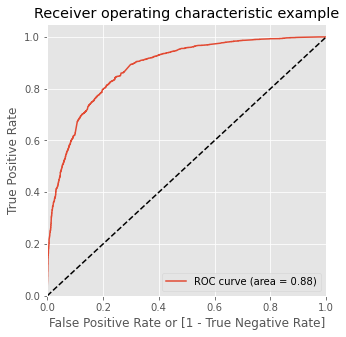

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

In [144]:
#ROC curve implies model performance is decent

In [145]:
#Finding Optimal Cutoff Point

# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.460024,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.122606,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.294856,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.841910,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.153574,3934,0,1,1,0,0,0,0,0,0,0,0


In [146]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.608998  0.975669  0.383058
0.2   0.2  0.738868  0.920114  0.627186
0.3   0.3  0.787570  0.834955  0.758371
0.4   0.4  0.801948  0.773317  0.819590
0.5   0.5  0.808905  0.697486  0.877561
0.6   0.6  0.791435  0.581914  0.920540
0.7   0.7  0.775974  0.499189  0.946527
0.8   0.8  0.750464  0.395377  0.969265
0.9   0.9  0.706555  0.247770  0.989255


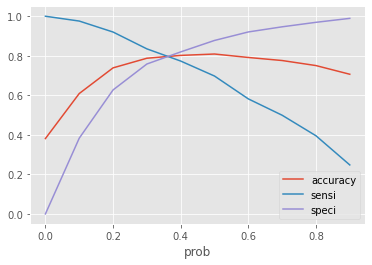

In [147]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [148]:
#From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [149]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.460024,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.122606,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.294856,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.841910,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.153574,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [150]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7993197278911565

In [151]:
#Confusion Metrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3202,  800],
       [ 498, 1968]], dtype=int64)

In [152]:
# Predicted     not_converted  converted
# Actual
# not_converted        3035      967
# converted            407       2059

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7980535279805353

In [155]:
# Specificit
TN / float(TN+FP)

0.8000999500249875

In [156]:
# False Positive Rate
print(FP/ float(TN+FP))

0.19990004997501248


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7109826589595376


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8654054054054054


In [159]:
#Precision and Recall

In [160]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3512,  490],
       [ 746, 1720]], dtype=int64)

In [161]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7782805429864253

In [162]:
#Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6974858069748581

In [163]:

from sklearn.metrics import precision_score, recall_score

In [164]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7782805429864253

In [165]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6974858069748581

In [166]:
#Precision and Recall Tradeoff

from sklearn.metrics import precision_recall_curve

In [167]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [168]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

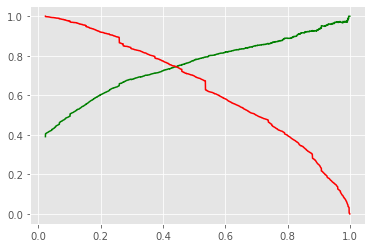

In [169]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [170]:
#X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

#X_test.head()

scaler = StandardScaler()

X_test[['Total Time Spent on Website']] = scaler.fit_transform(X_test[['Total Time Spent on Website']])

X_test.head()

,Lead Number,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Not Given,Country_Other Countries,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Given,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,619003,0,0,0.933036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,636884,0,0,-0.900812,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,590281,0,0,-0.793792,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,579892,0,0,-0.900812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,617929,0,0,-0.900812,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [171]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Not Given,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not Given,Last Notable Activity_Modified
4269,0,0.933036,0,0,0,0,0,0,1,1,0,1,0
2376,0,-0.900812,0,0,1,0,0,0,1,1,0,0,0
7766,0,-0.793792,0,0,0,0,0,0,0,0,1,0,0
9199,0,-0.900812,0,0,0,0,0,1,0,1,0,0,1
4359,0,-0.900812,0,0,1,0,1,0,0,0,0,0,0


In [172]:
X_test_sm = sm.add_constant(X_test)

In [173]:
#Making predictions
y_test_pred = res.predict(X_test_sm)

In [174]:
y_test_pred[:10]

4269    0.663220
2376    0.906175
7766    0.895306
9199    0.066668
4359    0.877084
9186    0.649228
1631    0.522230
8963    0.350031
8007    0.023320
5324    0.466558
dtype: float64

In [175]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [176]:
y_pred_1.head()

,0
4269,0.663220
2376,0.906175
7766,0.895306
9199,0.066668
4359,0.877084


In [177]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [178]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [179]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [181]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.663220
1,1,2376,0.906175
2,1,7766,0.895306
3,0,9199,0.066668
4,1,4359,0.877084


In [182]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [183]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conv_Prob'], axis=1)

In [184]:
y_pred_final.head()

,Lead Number,Converted,Conv_Prob
0,4269,1,0.663220
1,2376,1,0.906175
2,7766,1,0.895306
3,9199,0,0.066668
4,4359,1,0.877084


In [185]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.3 else 0)   #Applying cut-off of 0.3

y_pred_final['Lead Scores'] = y_pred_final.Conv_Prob.map(lambda x: x*100)

In [186]:
y_pred_final.head()

,Lead Number,Converted,Conv_Prob,final_predicted,Lead Scores
0,4269,1,0.663220,1,66.322045
1,2376,1,0.906175,1,90.617504
2,7766,1,0.895306,1,89.530629
3,9199,0,0.066668,0,6.666796
4,4359,1,0.877084,1,87.708390


In [187]:
#Top three Lead Scores

Top_Three_Scores=y_pred_final.sort_values('Lead Scores',ascending=False)

Top_Three_Scores

,Lead Number,Converted,Conv_Prob,final_predicted,Lead Scores
1026,5671,1,0.999028,1,99.902777
1853,7094,1,0.998423,1,99.842305
546,3478,1,0.998217,1,99.821746
835,4613,1,0.997728,1,99.772840
605,7187,1,0.997306,1,99.730631
...,...,...,...,...,...
2034,2454,0,0.005971,0,0.597083
2521,8733,0,0.005683,0,0.568268
1136,4098,0,0.005259,0,0.525880
597,3682,0,0.004882,0,0.488247


In [188]:
# overall accuracy
Accuracy_final = round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)*100,2)
Accuracy_final

78.79

In [189]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_final

array([[1285,  392],
       [ 196,  899]], dtype=int64)

In [190]:
# Predicted     not_converted  converted
# Actual
# not_converted        1285     192
# converted            196      899

In [191]:
TP_final= confusion_final[1,1] # true positive 
TN_final= confusion_final[0,0] # true negatives
FP_final= confusion_final[0,1] # false positives
FN_final= confusion_final[1,0] # false negatives

In [192]:
#Sensitivity of our logistic regression model
Sensitivity_final = round(TP_final / float(TP_final+FN_final)*100,2)

In [193]:
# specificity
Specificity_final = round(TN_final / float(TN_final+FP_final)*100,2)

In [194]:
Precision_final = round(confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])*100,2)

In [195]:
Recall_final = round(confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])*100,2)

In [196]:
# Test data Metrics
print('Test Data Metrics:')
print('=============================')
print('Sensitivity:',Sensitivity_final)   
print('Specificity:',Specificity_final)
print('Precision:',Precision_final) 
print('Recall:',Recall_final)
print('Accuracy:',Accuracy_final)

Test Data Metrics:
Sensitivity: 82.1
Specificity: 76.62
Precision: 69.64
Recall: 82.1
Accuracy: 78.79


***
<b>Recommendations</b>

From the final model we have following recommendations:
- Any lead beyond 0.37 cutoff probability should be considered as a Hot Lead
- Sales teams should focus on customer that are provided via referrals as Lead Source_Reference is the lead source that provided potential customers
- Working professionals as per the model are another type of customers that should be focused for lead conversions
- Leads that are generated from Landing Page Submissions can be given lesser priority while looking for potential customers
- People who have opted for Do Not Email can also given minimal priority for lead conversion
***